# Task_2 Dominos Store - Delivery Time
Assume that you are a freelance data scientist.
Help Kanav by analyzing the data and sharing insights to keep his business up and running.
# Problem Statement 🍕
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Dominos.
Dominos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Dominos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business.

# Import Libraries and Dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns


In [7]:
df= pd.read_csv("dominos_data.csv")

In [8]:
df.shape

(15000, 3)

In [9]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [11]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [12]:
df.order_placed_at.value_counts()

2023-03-27 10:46:29    2
2023-03-07 21:37:19    2
2023-03-13 02:21:03    2
2023-03-02 08:03:08    2
2023-03-14 08:26:18    2
                      ..
2023-03-09 21:36:44    1
2023-03-09 21:38:24    1
2023-03-09 21:39:38    1
2023-03-09 21:40:11    1
2023-03-27 23:58:20    1
Name: order_placed_at, Length: 14953, dtype: int64

In [13]:
df.order_delivered_at.value_counts()

2023-03-01 00:18:07.443132    1
2023-03-19 01:07:49.201947    1
2023-03-19 00:21:29.442187    1
2023-03-19 00:25:10.940369    1
2023-03-19 00:26:54.284720    1
                             ..
2023-03-09 21:37:06.852398    1
2023-03-09 21:32:17.178449    1
2023-03-09 21:34:47.382379    1
2023-03-09 21:37:02.264353    1
2023-03-28 00:13:42.499311    1
Name: order_delivered_at, Length: 15000, dtype: int64

# Data Analysis and Processing

In [14]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])

Feature Enginerring

In [15]:
# day of month
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [16]:
# month of year

df['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [17]:
#week of the year


df['order_placed_at'].dt.week

C:\Users\Chandni\AppData\Local\Temp\ipykernel_19976\3748134475.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week


0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: order_placed_at, Length: 15000, dtype: int64

In [18]:
# week of month

df['order_placed_at'].dt.week

C:\Users\Chandni\AppData\Local\Temp\ipykernel_19976\233814690.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week


0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: order_placed_at, Length: 15000, dtype: int64

In [19]:
# day of week?

df['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [20]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [21]:
df['day_of_month']= df['order_placed_at'].dt.day

In [22]:
df['day_of_week']= df['order_placed_at'].dt.day_name()

In [23]:
df.tail()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,27,Monday


<AxesSubplot:>

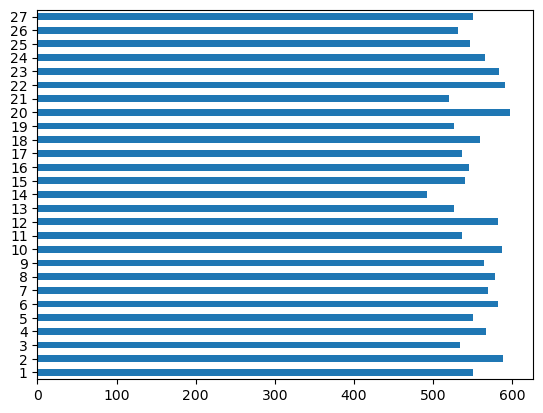

In [24]:
df['day_of_month'].value_counts().sort_index().plot(kind='barh')

<AxesSubplot:>

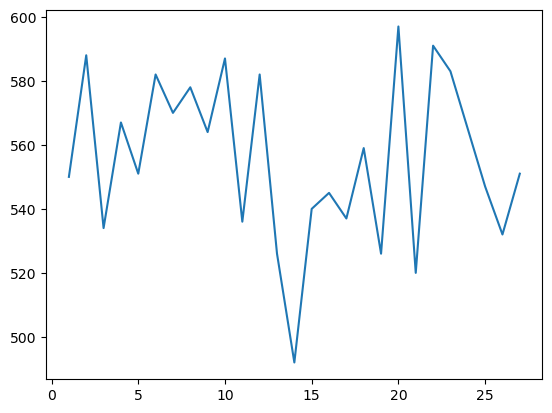

In [25]:
df['day_of_month'].value_counts().sort_index().plot(kind='line')

<AxesSubplot:>

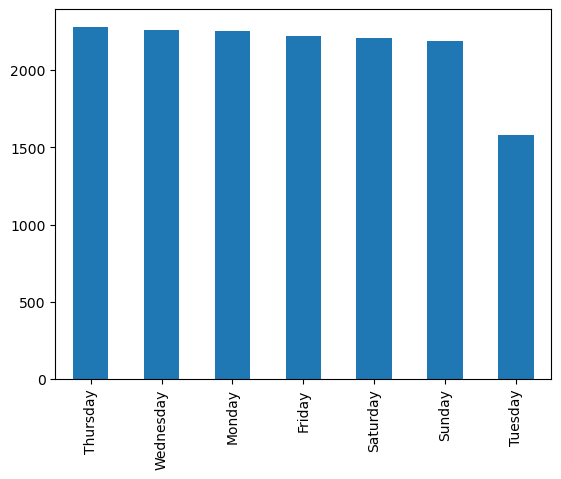

In [26]:
df['day_of_week'].value_counts().plot(kind='bar')

In [27]:
df['day_of_week'].describe()

count        15000
unique           7
top       Thursday
freq          2280
Name: day_of_week, dtype: object

In [28]:
df['day_of_week'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_of_week, dtype: int64

In [29]:
df['delivery_time'] = df['order_delivered_at'] - df['order_placed_at']
#df['delivery_time'] = df['delivery_time']/np.timedelta64(1,'m')

In [30]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,0 days 00:16:10.619056


In [31]:
df['delivery_time']=df['delivery_time'].dt.total_seconds()/60

In [32]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984


In [33]:
df['order_placed_date']=df['order_placed_at'].dt.date

In [34]:
df['order_placed_time']=df['order_placed_at'].dt.time

In [35]:
df['order_delivered_date']=df['order_delivered_at'].dt.date

In [36]:
df['order_delivered_time']=df['order_delivered_at'].dt.time

In [37]:
df['time_period'] = df['order_placed_at'].apply(lambda x: "late night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <=19 else "night"))))

In [38]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night


# Univariate Analysis

In [39]:
df['delivery_time'].mean()

20.499389326467746

In [40]:
df['delivery_time'].min()

15.000010333333334

In [41]:
df['delivery_time'].max()

7299.831374933334

In [42]:
df['delivery_time'].median()

15.797986066666668

# Detect Outliers and clean it

<AxesSubplot:>

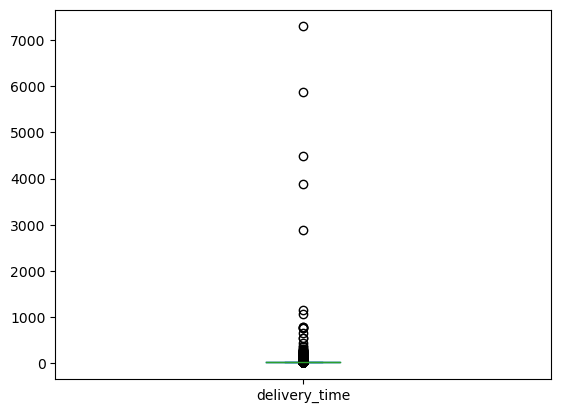

In [43]:
df['delivery_time'].plot(kind='box')

<AxesSubplot:>

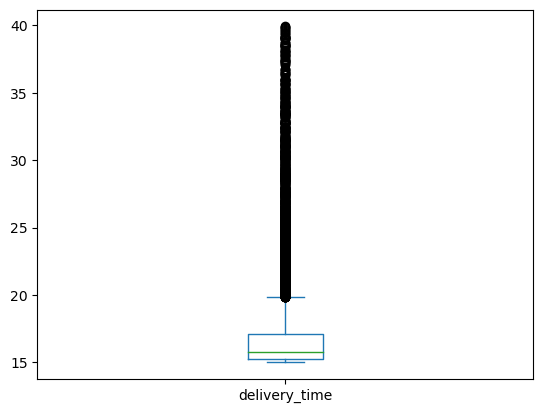

In [44]:
df1=df[df['delivery_time']<40]

df1['delivery_time'].plot(kind='box')

In [45]:
df1['delivery_time'].describe()

count    14669.000000
mean        16.992520
std          3.361265
min         15.000010
25%         15.266572
50%         15.763923
75%         17.099512
max         39.918947
Name: delivery_time, dtype: float64

In [46]:
df['delivery_time'].quantile(0.95)

27.261043996666658

# Check for delivery time more than 31 minute or late delivery

In [47]:
total_delivery=df['delivery_time'].count()
late_delivery=df[df['delivery_time']>31].shape
late_delivery


(557, 11)

In [48]:
total_delivery=df['delivery_time'].count()
total_delivery

15000

In [49]:
print("Delivery performance=",((15000-557)/15000)*100)

Delivery performance= 96.28666666666666


# Loss 

In [50]:
print("Total average loss: ", 557*500)

Total average loss:  278500


# REPORT
1. Delivery performance = 96.28%
2. Average delivery time= 17 min approx(after removing outliers)
3. Average daily transaction = 555
4. High Transaction = 597(20th march)
5. Lowest transaction = 492(14th march)
6. 95% percentile of delivery time=27.26 min

# Almost Dominos store doing good